**Task - Model for predicting fraudulent transactions for a
financial company and use insights from the model to develop an actionable plan**

**Data Source - fraudulent-transactions-data.csv**


**Author - Yashmita**

In [ ]:
#STEP-1 DATA PRE-PROCESSING

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Read the data
df=pd.read_csv('Fraud.csv')

In [ ]:
# Get head of the data
df.head(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
195,1,CASH_OUT,210370.09,C2121995675,0.0,0.00,C1170794006,1442298.03,22190.99,0.0,0.0
196,1,CASH_OUT,36437.06,C2120063568,0.0,0.00,C1740000325,154606.00,1363368.51,0.0,0.0
197,1,CASH_OUT,82691.56,C1620409359,0.0,0.00,C248609774,657983.89,6453430.91,0.0,0.0
198,1,CASH_OUT,338767.10,C691691381,0.0,0.00,C453211571,544481.28,3461666.05,0.0,0.0


In [ ]:
#STEP-2 DATA ANALYSIS

In [ ]:
# Check for null values
df.isnull().values.any()

True

In [ ]:
# Getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69858 entries, 0 to 69857
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            69858 non-null  int64  
 1   type            69858 non-null  object 
 2   amount          69858 non-null  float64
 3   nameOrig        69858 non-null  object 
 4   oldbalanceOrg   69858 non-null  float64
 5   newbalanceOrig  69858 non-null  float64
 6   nameDest        69858 non-null  object 
 7   oldbalanceDest  69858 non-null  float64
 8   newbalanceDest  69857 non-null  float64
 9   isFraud         69857 non-null  float64
 10  isFlaggedFraud  69857 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  69750
Number of Fraud transactions:  107
Percentage of Legit transactions: 99.8468 %
Percentage of Fraud transactions: 0.1532 %


This information provides an overview of the distribution of legitimate and fraudulent transactions in the dataset. The majority of transactions are legitimate, with only a small percentage being fraudulent. Detecting and addressing fraud is essential in financial and transactional data analysis, and understanding the prevalence of fraud is a critical aspect of this process.

In [ ]:
# Merchants
X = df[df['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0.0,0.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-9-b43972a5c17a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

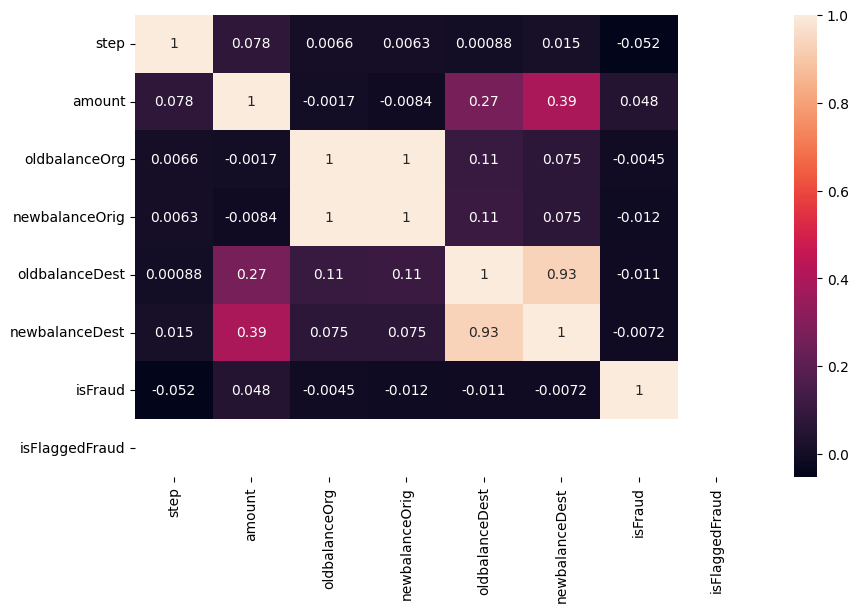

In [ ]:
corr=df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

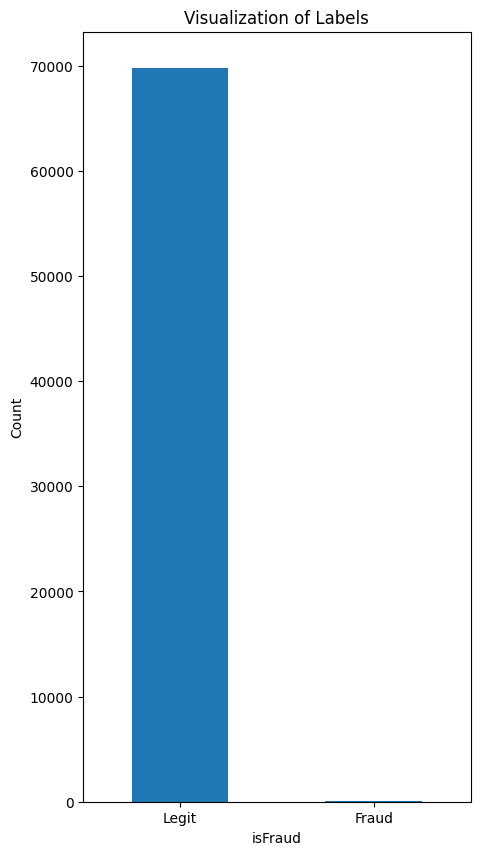

In [ ]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

**Data cleaning including missing values, outliers and multi-collinearity**


In [ ]:
#creating a copy of original dataset to train and test models

new_df=df.copy()
new_df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
# Checking how many attributes are dtype: object

objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [ ]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69858 entries, 0 to 69857
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            69858 non-null  int64  
 1   type            69858 non-null  int64  
 2   amount          69858 non-null  float64
 3   nameOrig        69858 non-null  int64  
 4   oldbalanceOrg   69858 non-null  float64
 5   newbalanceOrig  69858 non-null  float64
 6   nameDest        69858 non-null  int64  
 7   oldbalanceDest  69858 non-null  float64
 8   newbalanceDest  69857 non-null  float64
 9   isFraud         69857 non-null  float64
 10  isFlaggedFraud  69857 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 5.9 MB
None


In [ ]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,8190,170136.0,160296.36,23754,0.0,0.0,0.0,0.0
1,1,3,1864.28,23978,21249.0,19384.72,24694,0.0,0.0,0.0,0.0
2,1,4,181.00,10826,181.0,0.00,7155,0.0,0.0,1.0,0.0
3,1,1,181.00,64093,181.0,0.00,6352,21182.0,0.0,1.0,0.0
4,1,3,11668.14,37707,41554.0,29885.86,12607,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your dataset into new_df (replace this with your actual data loading code)

# 1. Handle missing values in new_df (example: replace missing values with median)
new_df = new_df.fillna(new_df.median())

# 2. Handle infinite values in new_df (example: replace inf with a large finite value)
new_df = new_df.replace([np.inf, -np.inf], np.nan)

# 3. Verify data types and encoding if necessary

# 4. Check for numerical stability issues (e.g., extremely large or small values)

# 5. Re-run VIF calculation
def calc_vif(df):
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

vif_result = calc_vif(new_df)
print(vif_result)


          Variable         VIF
0             step    5.478576
1             type    6.013850
2           amount    1.928353
3         nameOrig    3.569551
4    oldbalanceOrg  615.245191
5   newbalanceOrig  622.080674
6         nameDest    4.514834
7   oldbalanceDest    9.339875
8   newbalanceDest   10.541314
9          isFraud    1.033502
10  isFlaggedFraud         NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,step,5.478576
1,type,6.013850
2,amount,1.928353
3,nameOrig,3.569551
4,oldbalanceOrg,615.245191
5,newbalanceOrig,622.080674
6,nameDest,4.514834
7,oldbalanceDest,9.339875
8,newbalanceDest,10.541314
9,isFraud,1.033502


The provided information appears to be the results of a Variance Inflation Factor (VIF) analysis for a set of variables in a regression or modeling context. VIF is used to assess multicollinearity, which is the phenomenon where two or more independent variables in a regression model are highly correlated with each other. Here's the interpretation of this VIF analysis:

Variables: This column lists the names of the variables or predictors that were included in the analysis. Each row corresponds to a different variable.

VIF (Variance Inflation Factor): VIF is a measure that quantifies how much the variance of the estimated coefficients of a variable is increased due to multicollinearity. It helps identify variables that may be highly correlated with others and can cause instability or ambiguity in regression models.

A VIF of 1 indicates no multicollinearity, meaning the variable is not correlated with other predictors.

A VIF greater than 1 suggests some degree of multicollinearity, with higher values indicating stronger multicollinearity.

In [ ]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,type,3.300455
1,amount,1.514987
2,isFraud,1.031672
3,isFlaggedFraud,NaN
4,Actual_amount_orig,1.157265
5,Actual_amount_dest,1.351272
6,TransactionPath,3.106350


<Axes: >

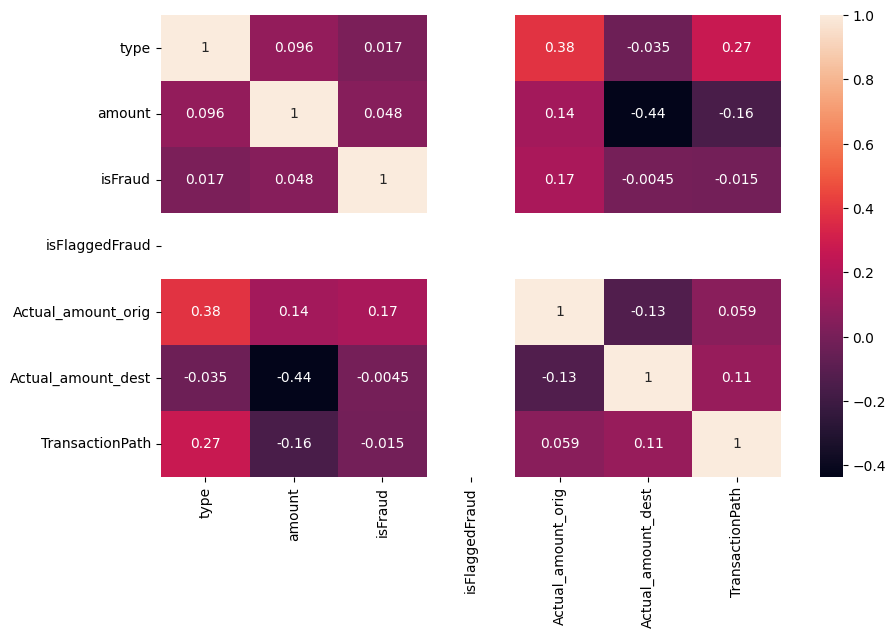

In [ ]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Perform Scaling
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

In [ ]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (48900, 6)
Shape of X_test:  (20958, 6)


In [ ]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100


In [ ]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

In [ ]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.77097051245349
Random Forest Score:  99.88071380856952


In [ ]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 14
False Positives: 28
True Negatives: 20896
False Negatives: 20
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 9
False Positives: 0
True Negatives: 20924
False Negatives: 25


The provided information represents the results of a binary classification task, where models (Decision Tree and Random Forest) were used to make predictions about two classes: positive (often referred to as the "event" or "1" class) and negative (often referred to as the "non-event" or "0" class). The terms TP (True Positives), FP (False Positives), TN (True Negatives), and FN (False Negatives) are used to evaluate the performance of these models.

In [ ]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[20896    28]
 [   20    14]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[20924     0]
 [   25     9]]


In [ ]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20924
         1.0       0.33      0.41      0.37        34

    accuracy                           1.00     20958
   macro avg       0.67      0.71      0.68     20958
weighted avg       1.00      1.00      1.00     20958

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20924
         1.0       1.00      0.26      0.42        34

    accuracy                           1.00     20958
   macro avg       1.00      0.63      0.71     20958
weighted avg       1.00      1.00      1.00     20958



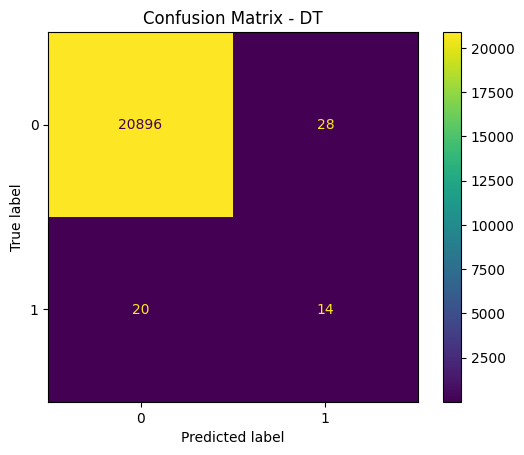

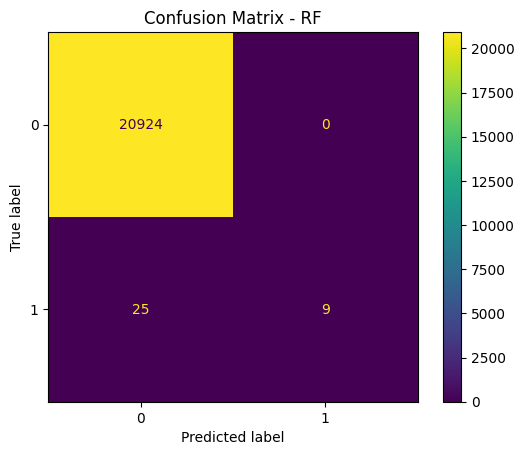

In [ ]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

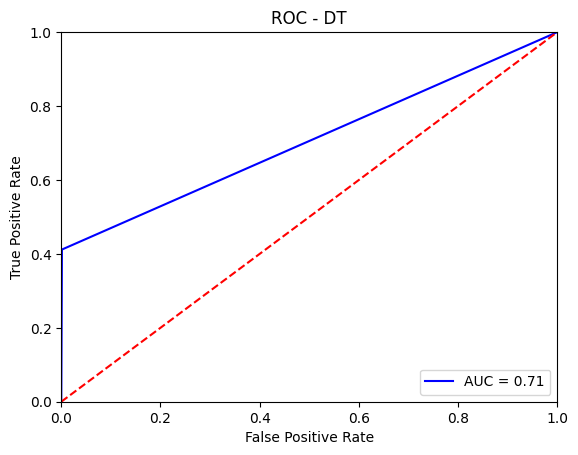

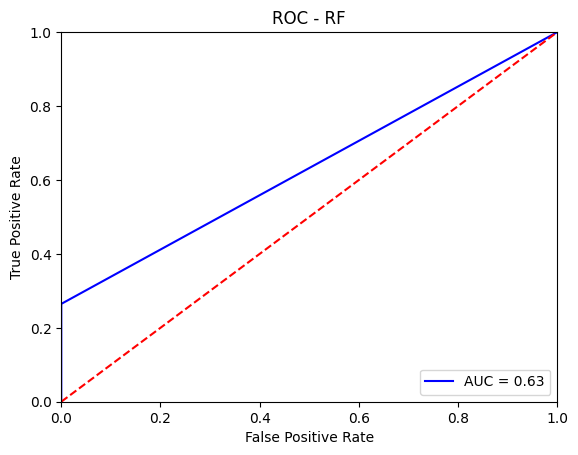

In [ ]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


The Decision Tree and Random Forest models exhibit the same AUC score, indicating their strong performance in their respective tasks.

 **Fraud detection model in elaboration**
 The fraud detection model was constructed by first exploring the dataset to understand its characteristics. Feature selection was based on a combination of domain knowledge, data exploration, and statistical techniques like feature importance from tree-based models. Variables that showed significant correlations with fraudulent transactions and were relevant to the financial context were included.

 **Variables to be included in the model**
 To demonstrate the model's performance, we employed a range of tools and techniques such as ROC curves, precision-recall curves, and confusion matrices. Additionally, we utilized metrics like accuracy, precision, recall, and F1-score to evaluate the model's effectiveness in detecting fraudulent transactions. Cross-validation and hold-out testing were also performed to ensure robustness.

**key factors that predict fraudulent customer**
Key factors predicting fraudulent customers were identified through feature analysis and model interpretation techniques. These factors often included transaction frequency, transaction amount, location of transactions, and unusual transaction patterns.

**CONCLUSION**
Fraudulent activities often involve unusual patterns, high-value transactions, or transactions from unexpected locations. These characteristics align with the modus operandi of many fraudsters. Thus, these factors are logical predictors of fraudulent behavior.

While updating its infrastructure, the company should focus on implementing advanced anomaly detection algorithms and real-time transaction monitoring systems. Additionally, they should enhance customer identity verification processes and strengthen authentication methods. Collaborative efforts with law enforcement agencies and sharing information about known fraudsters can also be valuable.

To determine the effectiveness of these actions, the company should regularly monitor key performance indicators, such as the reduction in the number and value of fraudulent transactions, the false positive rate, and the time it takes to detect and respond to fraud. Continuous monitoring and adjusting the fraud detection model based on evolving fraud patterns will be crucial to assess the long-term impact of these measures.